In [1]:
import numpy as np
from csv import reader
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
classes=['HEALTHY','MEDICATION','SURGERY']
numC=len(classes)
dim=3

In [3]:
def load_csv(filename):
    dataset = list()
    data=list()
    lables=list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    dataset.pop(0)
    for rows in dataset:
        lab=rows[0]
        rows.remove(lab)
        lables.append(lab)
        rows = [float(i) for i in rows]
        data.append(rows)
    return data,lables

In [4]:
def classData(data,lables):
    Cdata={}
    for j in classes:
        Cdata[j]=list()
    for i in range(len(lables)):
        Cdata[lables[i]].append(data[i])
    return Cdata

In [5]:
def means(data,lables):
    dat=np.array(data)
    sums={}
    num={}
    for j in classes:
        sums[j]=np.array([0]*dim)
        num[j]=0
    for i in range(len(lables)):
#         print(sums[lables[i]])
        sums[lables[i]]=sums[lables[i]]+dat[i]
        num[lables[i]]=num[lables[i]]+1
    means={}
    for lab in sums:
        means[lab]=sums[lab]/num[lab]
    Cmeans=means
    return Cmeans

In [6]:
def mean(data):
    dat=np.array(data)
    num=0
    sums=np.array([0]*dim)
    for i in range (len(dat)):
        sums=sums+dat[i]
        num+=1
    return np.array(sums/num)

In [7]:
def CSb(Cdata,Cmeans,mean):
    mean=np.array(mean)
    S_B={}
    for j in Cmeans.keys():
        S_B[j] = np.zeros((dim,dim))         
    for i in Cmeans.keys():  
        S_B[i] += len(Cdata[i])*np.outer((Cmeans[i] - mean),(Cmeans[i] - mean))
    return S_B

In [8]:
def Sb(Cdata,Cmeans,mean):
    mean=np.array(mean)
    S_B = np.zeros((dim,dim))         
    for i in Cmeans.keys():  
        S_B += len(Cdata[i])*np.outer((Cmeans[i] - mean),(Cmeans[i] - mean))
    return S_B

In [9]:
def Sw(Cdata,Cmeans):
    S_W=np.zeros((dim,dim))
    for i in Cmeans.keys():
        for row in Cdata[i]:
            S_W+=np.outer((row-Cmeans[i]),(row-Cmeans[i]))
    return S_W

In [10]:
def Ceigen(CSb,Sw):
    mat={}
    eigvals={}
    eigvecs={}
    eig={}
    for k in classes:
        mat[k] = np.dot(np.linalg.pinv(Sw), CSb[k])         
        eigvals[k], eigvecs[k] = np.linalg.eig(mat[k])         
        eig[k] = [(eigvals[k][i], eigvecs[k][:, i]) for i in range(len(eigvals[k]))]
        eig[k] = sorted(eig[k], key = lambda x : x[0], reverse = True) 
    return eig

In [11]:
def eigen(Sb,Sw):
    mat = np.dot(np.linalg.pinv(Sw), Sb)         
    eigvals, eigvecs = np.linalg.eig(mat)         
    eig = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
    eig = sorted(eig, key = lambda x : x[0], reverse = True) 
    return eig

In [12]:
def projData(w,x):
    x=np.array(x)
    w=np.array(w)
    return (np.dot(x,w.T))

----------------------Test------------------

In [13]:
a,b=load_csv('data/Medical_data.csv')

In [14]:
a

[[1.6315155608144196, -0.26444658130172355, 2.5345671466514252],
 [0.15395105426389907, 1.4195334815051739, 1.3331207912724836],
 [2.021729118164318, 0.26204637889999405, 2.879971738050873],
 [0.1904120153407732, 2.5610254038027347, 1.1420868513138422],
 [0.08054931798451936, 0.33873132776813514, 3.4542513617685415],
 [2.1655765700938447, -0.16057524658368127, 2.284394762757739],
 [-0.4332301934147312, 4.240552788398508, -0.30918806020039746],
 [2.414009628364205, 0.6872226803639433, 2.3267450689660447],
 [0.004119281333839056, 2.2505842768435858, 2.5318116842309535],
 [0.39601827954098373, 1.3622060159509521, 0.30870406959929597],
 [1.276565880893257, -0.39593048483385457, 1.9943371678997588],
 [1.7925631793883903, -0.004810603739465248, 1.5459774410377247],
 [0.1774206062663019, 2.8499350281251874, -0.026212687115433564],
 [1.2642701542253791, -0.24547112381045683, 1.3504646333102324],
 [0.0012534983164221147, 3.778927372621486, -0.2280530406903849],
 [-0.02839586296508359, 3.3150522

In [15]:
b

['HEALTHY',
 'SURGERY',
 'HEALTHY',
 'SURGERY',
 'HEALTHY',
 'HEALTHY',
 'MEDICATION',
 'HEALTHY',
 'SURGERY',
 'SURGERY',
 'HEALTHY',
 'HEALTHY',
 'SURGERY',
 'HEALTHY',
 'MEDICATION',
 'SURGERY',
 'SURGERY',
 'MEDICATION',
 'MEDICATION',
 'MEDICATION',
 'SURGERY',
 'SURGERY',
 'MEDICATION',
 'MEDICATION',
 'MEDICATION',
 'SURGERY',
 'HEALTHY',
 'MEDICATION',
 'MEDICATION',
 'MEDICATION',
 'HEALTHY',
 'HEALTHY',
 'MEDICATION',
 'SURGERY',
 'HEALTHY',
 'SURGERY',
 'SURGERY',
 'HEALTHY',
 'HEALTHY',
 'SURGERY',
 'SURGERY',
 'SURGERY',
 'HEALTHY',
 'HEALTHY',
 'HEALTHY',
 'SURGERY',
 'HEALTHY',
 'SURGERY',
 'HEALTHY',
 'MEDICATION',
 'SURGERY',
 'SURGERY',
 'SURGERY',
 'MEDICATION',
 'SURGERY',
 'SURGERY',
 'MEDICATION',
 'HEALTHY',
 'SURGERY',
 'SURGERY',
 'HEALTHY',
 'MEDICATION',
 'MEDICATION',
 'SURGERY',
 'SURGERY',
 'HEALTHY',
 'SURGERY',
 'SURGERY',
 'SURGERY',
 'SURGERY',
 'MEDICATION',
 'MEDICATION',
 'HEALTHY',
 'SURGERY',
 'MEDICATION',
 'SURGERY',
 'HEALTHY',
 'HEALTHY',
 'SU

In [16]:
c=means(a,b)
print(c)

{'HEALTHY': array([1.94132521, 0.01029942, 1.86774638]), 'MEDICATION': array([1.38677124e+00, 1.60134766e+00, 1.29091747e-03]), 'SURGERY': array([0.00351107, 1.7257616 , 1.49419606])}


In [17]:
d=mean(a)
print(d)

[1.11053584 1.11246956 1.12107778]


In [18]:
e=classData(a,b)
print(e['MEDICATION'])

[[-0.4332301934147312, 4.240552788398508, -0.30918806020039746], [0.0012534983164221147, 3.778927372621486, -0.2280530406903849], [0.538876718510805, 2.6363290497348, 0.3489356782859501], [0.7260269953105752, 2.4698483383666687, 0.1264287464664588], [2.284585615555568, 1.6854256568400934, -0.17144339344204765], [1.6365550961875897, 1.063604985386225, -0.13393721610746603], [1.2202578882367812, 1.8312283420715287, 0.3418802067881855], [1.9783750317244286, 1.670447361783991, -0.028568625655389666], [2.5203388862985316, -1.8665098154126267, 0.016304319855044543], [0.536774879365929, 0.705067834015922, 0.16228305343789923], [0.10978642713227707, 2.7857479846759534, 0.20909257652655683], [-0.12741566770291332, 2.43978083727575, -0.09906466367267612], [0.21273594289997255, 2.6116907828310483, 0.08648738651262662], [1.611297943495867, 2.51409026259212, -0.0229855049492135], [-0.3450973427268738, 2.372358772479682, -0.475787558296065], [-1.226265137896333, 3.1263875945827784, 0.044744635339169

In [19]:
f=Sb(e,c,d)
print(f)

[[ 1992.02082294 -1459.55528327  -102.05161616]
 [-1459.55528327  1829.90794766 -1141.56463752]
 [ -102.05161616 -1141.56463752  1950.65385896]]


In [20]:
g=Sw(e,c)
print(g)

[[ 2488.12497627 -1122.79627415  -464.51852074]
 [-1122.79627415  3364.95687928 -1410.39522996]
 [ -464.51852074 -1410.39522996  2753.7856017 ]]


In [21]:
h=eigen(f,g)
print(h)

[(0.9146492220524777, array([ 0.86841967, -0.25012268,  0.42811905])), (0.6715788023583321, array([-0.33407264,  0.12589883,  0.93410115])), (1.1102230246251565e-16, array([0.54405845, 0.71143725, 0.4448117 ]))]


In [27]:
i=np.array([[0.86841967, -0.25012268,  0.42811905],[-0.33407264,  0.12589883,  0.93410115]])
print(i)

[[ 0.86841967 -0.25012268  0.42811905]
 [-0.33407264  0.12589883  0.93410115]]


In [28]:
j=projData(i,a)

AttributeError: 'tuple' object has no attribute 'shape'

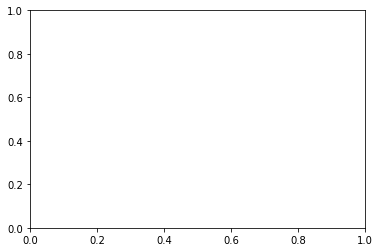

In [38]:
for  i in range(len(b)):
    if(b[i]=='HEALTHY'):
        c=(0,0,255)
    elif(b[i]=='MEDICATION'):
        c=(0,255,0)
    else :
        c=(255,0,0)
    plt.scatter(j[i][0],j[i][1],c=c,marker='.')
plt.show

<bound method Axes3D.plot of <mpl_toolkits.mplot3d.axes3d.Axes3D object at 0x000002397A5946D8>>

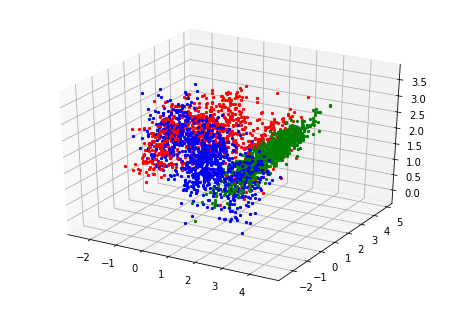

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
for  i in range(len(b)):
    if(b[i]=='HEALTHY'):
        c='g'
    elif(b[i]=='MEDICATION'):
        c='b'
    else :
        c='r'
    ax.scatter(j[i][0],j[i][1],j[i][2],c=c,marker='.')
#     ax.scatter(a[i][0],5,a[i][2],c=c,marker='.')
#     ax.scatter(a[i][0],a[i][1],-2,c=c,marker='.')
ax.plot

<bound method Axes3D.plot of <mpl_toolkits.mplot3d.axes3d.Axes3D object at 0x000002397B88AA90>>

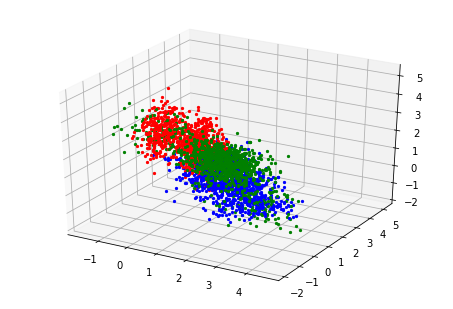

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
for  i in range(len(b)):
    if(b[i]=='HEALTHY'):
        c='g'
    elif(b[i]=='MEDICATION'):
        c='b'
    else :
        c='r'
    ax.scatter(a[i][0],a[i][1],a[i][2],c=c,marker='.')
#     ax.scatter(a[i][0],5,a[i][2],c=c,marker='.')
#     ax.scatter(a[i][0],a[i][1],-2,c=c,marker='.')
ax.plot

In [34]:
print(list(j))

[array([2.56808077, 1.78920386]), array([0.34937101, 1.37255643]), array([2.92313636, 2.04777186]), array([0.01373614, 1.3256433 ]), array([1.46405704, 3.24235672]), array([2.89878572, 1.39017966]), array([-1.56925335,  0.38979807]), array([2.92060735, 1.45348121]), array([0.52457191, 2.64693799]), array([0.13535354, 0.3275621 ]), array([2.06143985, 1.38659972]), array([2.21976276, 0.84464734]), array([-0.56997999,  0.27504681]), array([1.7374746 , 0.80820797]), array([-1.04174073,  0.26231917]), array([-1.03529057,  0.03092207]), array([-0.07007718,  1.61086525]), array([-0.04204853,  0.47782799]), array([0.06685759, 0.1865025 ]), array([ 1.48901772, -0.7111699 ]), array([-0.59048251,  1.28445196]), array([-0.72477293,  0.41014546]), array([ 1.09784383, -0.53793257]), array([0.74802964, 0.14224543]), array([ 1.28801225, -0.47729959]), array([-1.03892765,  0.10101058]), array([1.82439667, 1.40617789]), array([ 2.66254849, -1.06173778]), array([0.35926887, 0.0610342 ]), array([-0.511921